In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix,precision_score,recall_score,accuracy_score,ConfusionMatrixDisplay

In [ ]:
df=pd.read_csv(r"/content/drive/MyDrive/Datasets/breast-cancer.csv")

In [ ]:
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [ ]:
df.tail(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
559,925291,B,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,...,12.480,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732
560,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321
561,925311,B,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905
562,925622,M,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,...,17.520,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.23560,0.4089,0.14090
563,926125,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,...,24.290,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.25420,0.2929,0.09873
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039


In [ ]:
print("No.of rows in the dataset:",df.shape[0])
print("No.of columns in the dataset:",df.shape[1])

No.of rows in the dataset: 569
No.of columns in the dataset: 32


In [ ]:
# Data Cleaning:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
numerical_features=[feature for feature in df.columns if df[feature].dtype=="O"]
categorical_features=[feature for feature in df.columns if df[feature].dtype!="O"]

In [ ]:
print("we have {} categorical_features in the dataset:".format(len(categorical_features)))
print("we have {} numerical_features in the dataset:".format(len(numerical_features)))

we have 31 categorical_features in the dataset:
we have 1 numerical_features in the dataset:


In [ ]:
# Convert categorical to numerical features:
from sklearn.preprocessing import LabelEncoder

In [ ]:
LE=LabelEncoder()

df["diagnosis"]=LE.fit_transform(df["diagnosis"])

In [ ]:
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [ ]:
df["diagnosis"].value_counts()   # M- Malignant B- Benign.

0    357
1    212
Name: diagnosis, dtype: int64

In [ ]:
df.rename(columns={"concave points_mean":"concave_points_mean"},inplace=True)
df.rename(columns={"concave points_se":"concave_points_se"},inplace=True)

In [ ]:
# Correlation:
df.corr()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave_points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


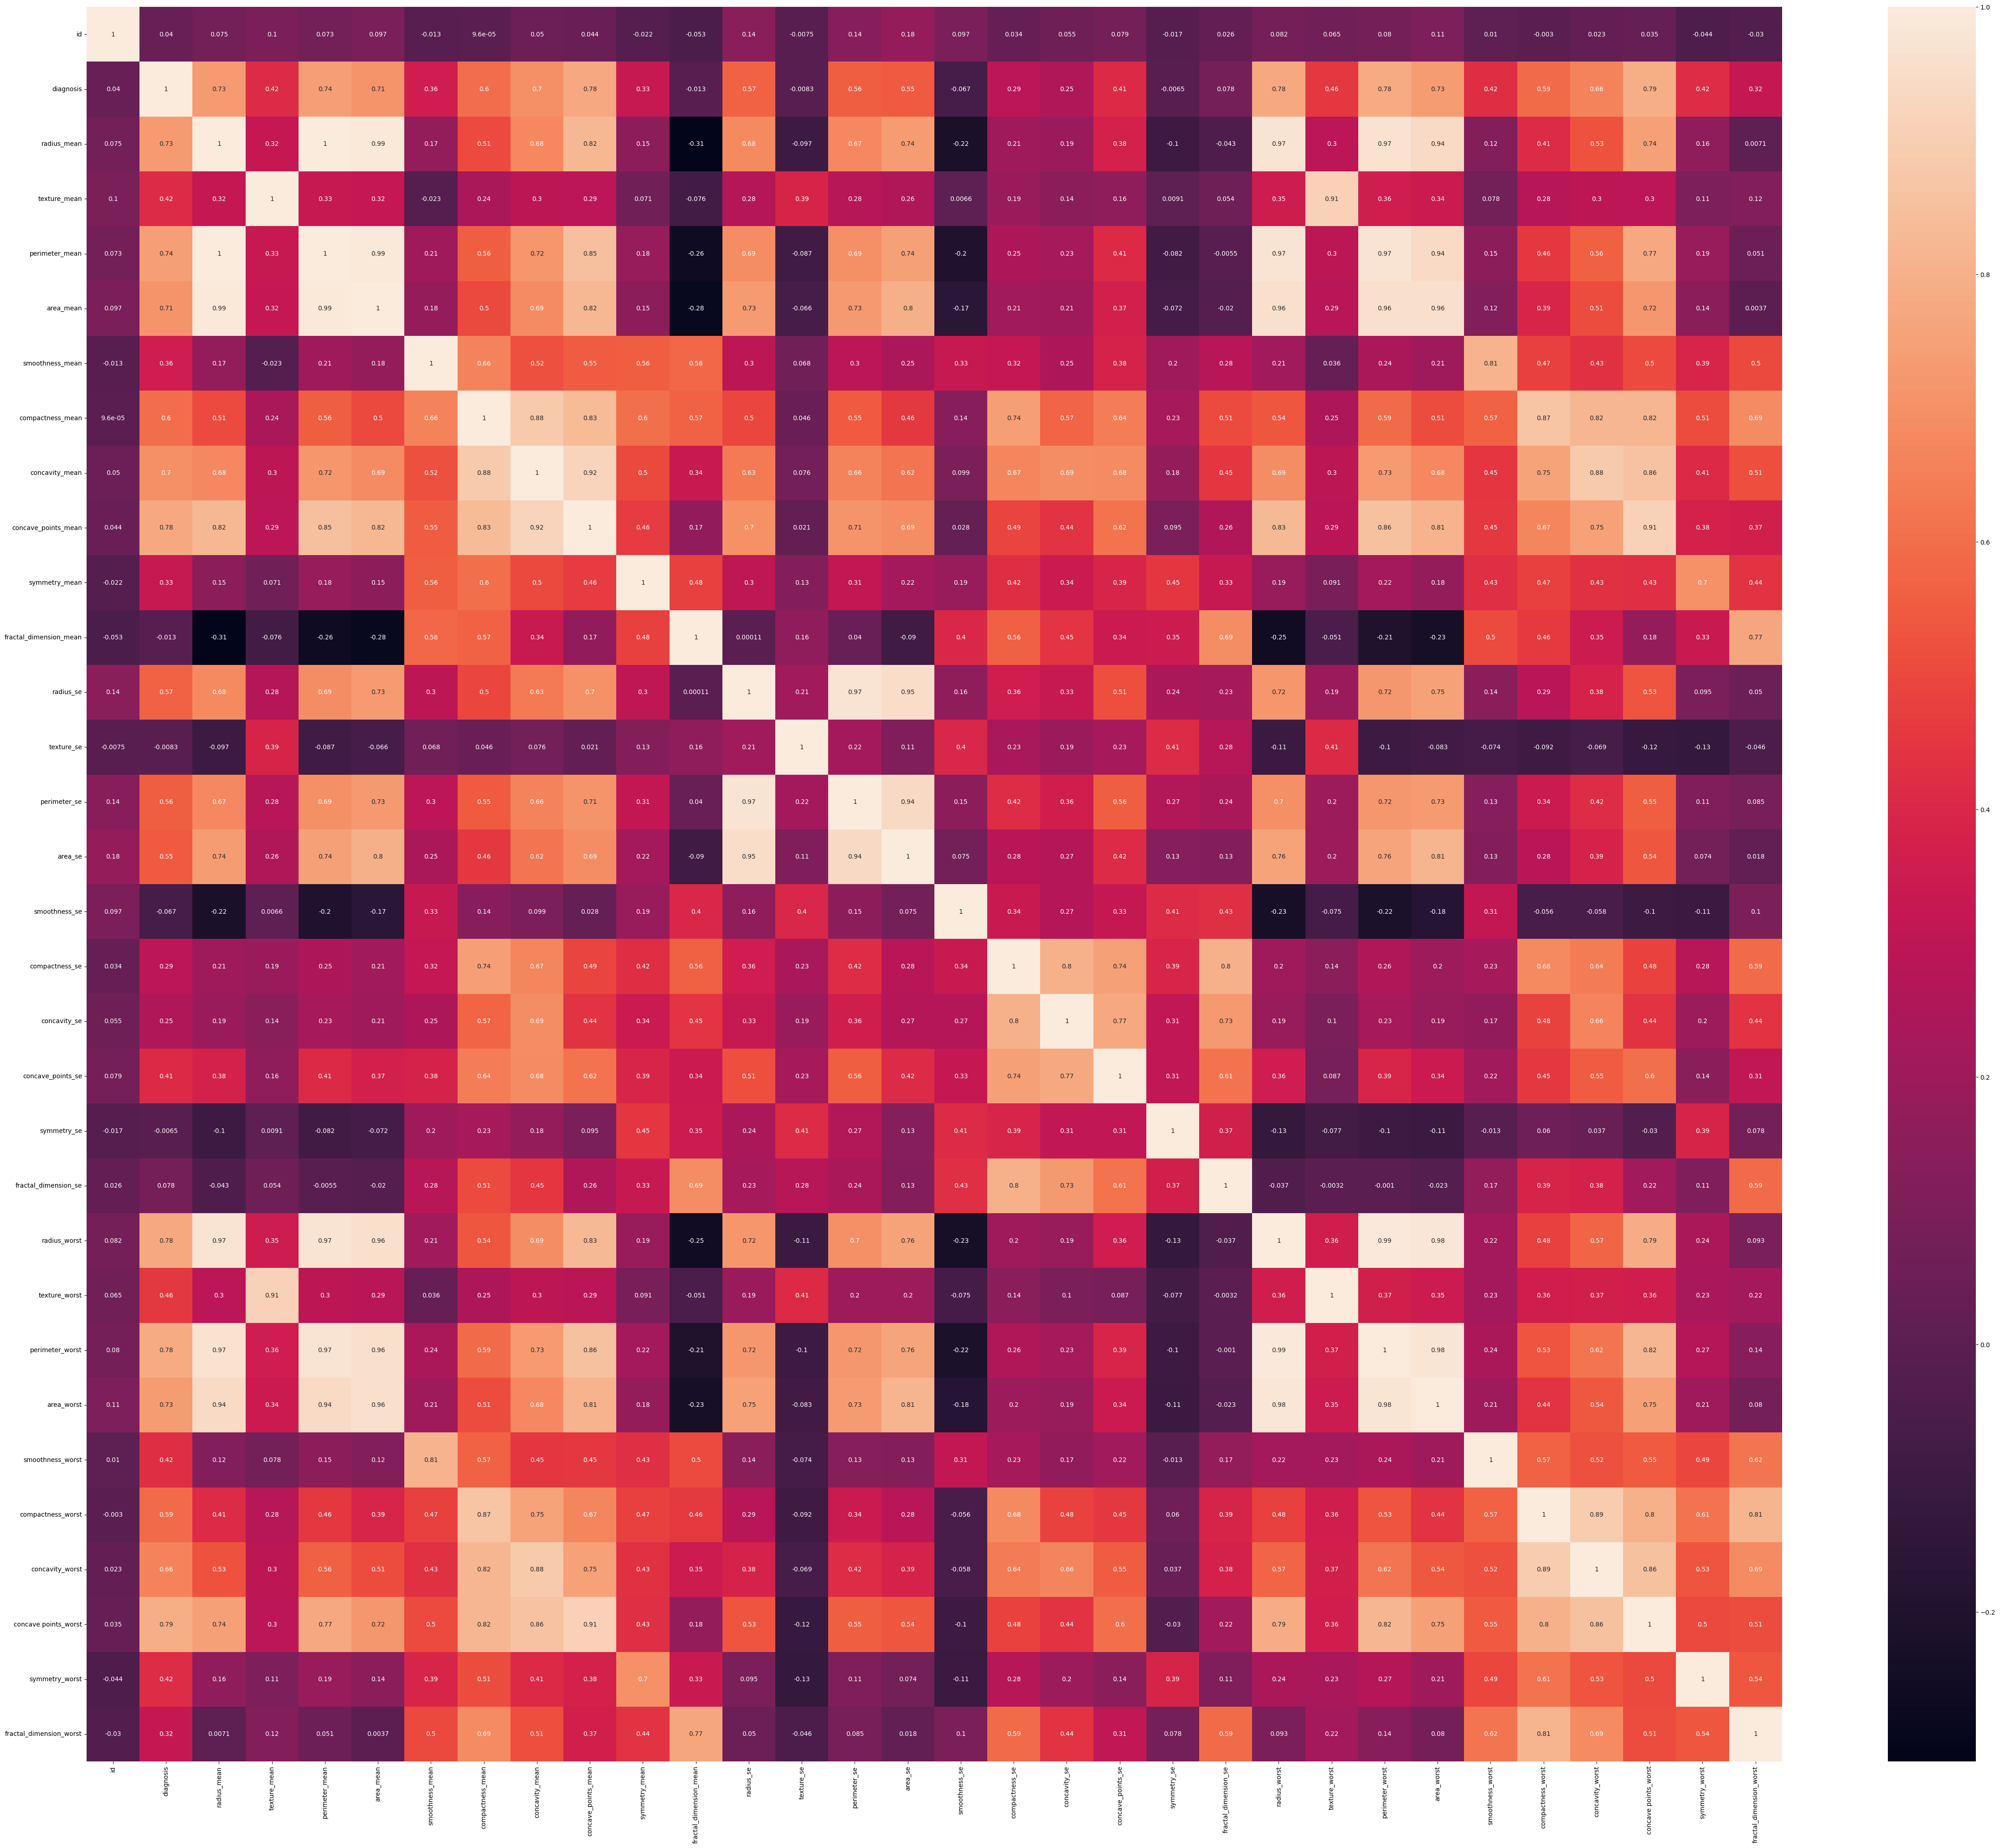

In [ ]:
fig,ax=plt.subplots(figsize=(60,50))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
# split the dataset into Independent and Dependent variables:
x=df.drop(["diagnosis"],axis=1)
y=df["diagnosis"]

In [ ]:
# Feature selection:
from sklearn.feature_selection import RFE

In [ ]:
LR=LinearRegression()
RF=RFE(LR,n_features_to_select=12)
RF.fit(x,y)
selected_features=x.columns[RF.support_]
print(selected_features)

Index(['smoothness_mean', 'compactness_mean', 'concave_points_mean',
       'fractal_dimension_mean', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave_points_se', 'smoothness_worst',
       'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [ ]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
X=df[['smoothness_mean', 'compactness_mean', 'concave_points_mean',
       'fractal_dimension_mean', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave_points_se', 'smoothness_worst',
       'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst']]

In [ ]:
X

,smoothness_mean,compactness_mean,concave_points_mean,fractal_dimension_mean,smoothness_se,compactness_se,concavity_se,concave_points_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,0.11840,0.27760,0.14710,0.07871,0.006399,0.04904,0.05373,0.01587,0.16220,0.7119,0.4601,0.11890
1,0.08474,0.07864,0.07017,0.05667,0.005225,0.01308,0.01860,0.01340,0.12380,0.2416,0.2750,0.08902
2,0.10960,0.15990,0.12790,0.05999,0.006150,0.04006,0.03832,0.02058,0.14440,0.4504,0.3613,0.08758
3,0.14250,0.28390,0.10520,0.09744,0.009110,0.07458,0.05661,0.01867,0.20980,0.6869,0.6638,0.17300
4,0.10030,0.13280,0.10430,0.05883,0.011490,0.02461,0.05688,0.01885,0.13740,0.4000,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.11100,0.11590,0.13890,0.05623,0.010300,0.02891,0.05198,0.02454,0.14100,0.4107,0.2060,0.07115
565,0.09780,0.10340,0.09791,0.05533,0.005769,0.02423,0.03950,0.01678,0.11660,0.3215,0.2572,0.06637
566,0.08455,0.10230,0.05302,0.05648,0.005903,0.03731,0.04730,0.01557,0.11390,0.3403,0.2218,0.07820
567,0.11780,0.27700,0.15200,0.07016,0.006522,0.06158,0.07117,0.01664,0.16500,0.9387,0.4087,0.12400


In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
# Split the dataset into train and test split...

from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(398, 12)
(171, 12)
(398,)
(171,)


In [ ]:
LOR=LogisticRegression()

LOR.fit(X_train,y_train)

print("Training score for Logisctic Regression:",LOR.score(X_train,y_train))

Training score for Logisctic Regression: 0.8467336683417085


In [ ]:
y_pred_LOR=LOR.predict(X_test)

In [ ]:
DC=DecisionTreeClassifier()

DC.fit(X_train,y_train)

print("Training score for Decision Tree Classifier:",DC.score(X_train,y_train))

Training score for Decision Tree Classifier: 1.0


In [ ]:
y_pred_DC=DC.predict(X_test)

In [ ]:
RF=RandomForestClassifier()

RF.fit(X_train,y_train)

print("Training score for Random forest Classifier:",RF.score(X_train,y_train))

Training score for Random forest Classifier: 1.0


In [ ]:
y_pred_RF=RF.predict(X_test)

In [ ]:
KNN=KNeighborsClassifier()

KNN.fit(X_train,y_train)

print("Training score for KNearest Neighbors Classifier:",KNN.score(X_train,y_train))

Training score for KNearest Neighbors Classifier: 0.9296482412060302


In [ ]:
y_pred_KNN=KNN.predict(X_test)

*********Logistic Regression**********


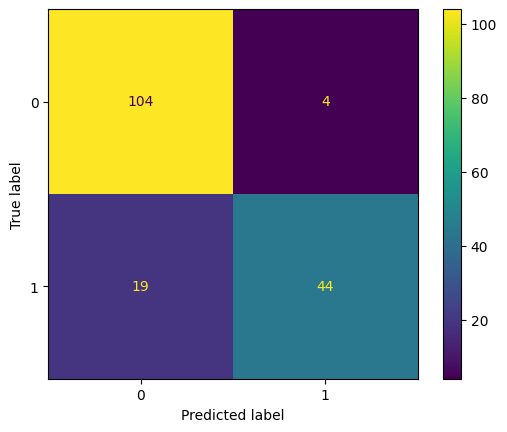

In [ ]:
print("*********Logistic Regression**********")
cm=confusion_matrix(y_test,y_pred_LOR)
cm

cm_display=ConfusionMatrixDisplay(cm)
cm_display.plot()

*********Decision Tree Classifier**********


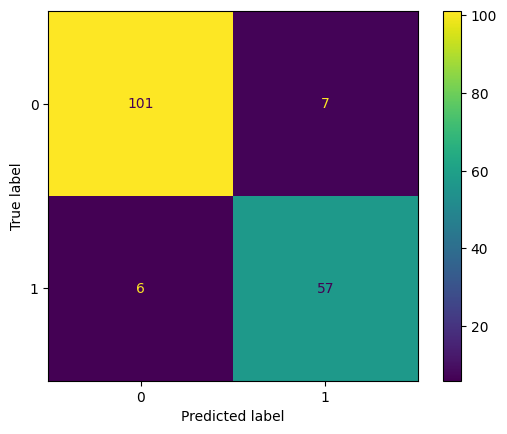

In [ ]:
print("*********Decision Tree Classifier**********")
cm=confusion_matrix(y_test,y_pred_DC)
cm

cm_display=ConfusionMatrixDisplay(cm)
cm_display.plot()

*********Random Forest Classifier**********


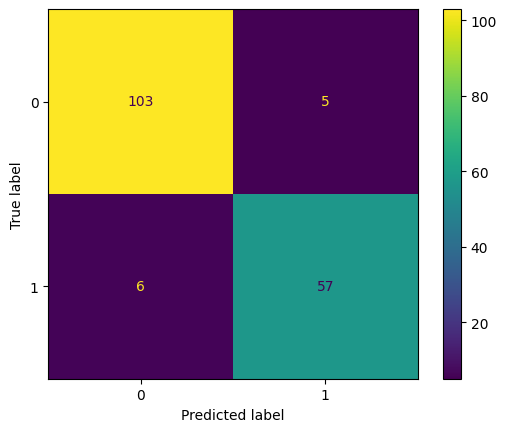

In [ ]:
print("*********Random Forest Classifier**********")
cm=confusion_matrix(y_test,y_pred_RF)
cm

cm_display=ConfusionMatrixDisplay(cm)
cm_display.plot()

*********Knearest Neighbors Classifier**********


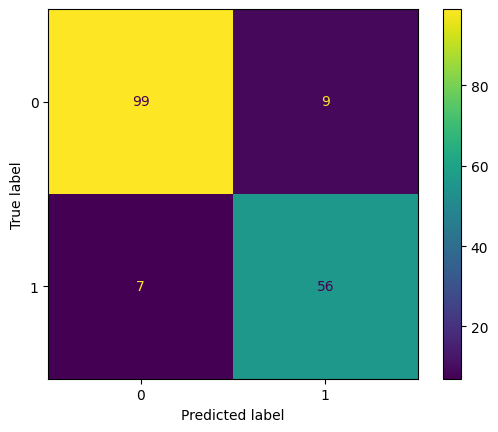

In [ ]:
print("*********Knearest Neighbors Classifier**********")
cm=confusion_matrix(y_test,y_pred_KNN)
cm

cm_display=ConfusionMatrixDisplay(cm)
cm_display.plot()

In [ ]:
print("**************Acurracy score*****************")
print("Accuracy for Logistic regression:",accuracy_score(y_test,y_pred_LOR))
print("Accuracy for Decision Tree Classifier:",accuracy_score(y_test,y_pred_DC))
print("Accuracy for Random Forest Classifier:",accuracy_score(y_test,y_pred_RF))
print("Accuracy for Knearest Neighbors classifier:",accuracy_score(y_test,y_pred_KNN))

**************Acurracy score*****************
Accuracy for Logistic regression: 0.8654970760233918
Accuracy for Decision Tree Classifier: 0.9239766081871345
Accuracy for Random Forest Classifier: 0.935672514619883
Accuracy for Knearest Neighbors classifier: 0.9064327485380117


In [ ]:
print("**************Precision score*****************")
print("Precision for Logistic regression:",precision_score(y_test,y_pred_LOR))
print("Precision for Decision Tree Classifier:",precision_score(y_test,y_pred_DC))
print("Precision for Random Forest Classifier:",precision_score(y_test,y_pred_RF))
print("Precision for Knearest Neighbors classifier:",precision_score(y_test,y_pred_KNN))

**************Precision score*****************
Precision for Logistic regression: 0.9166666666666666
Precision for Decision Tree Classifier: 0.890625
Precision for Random Forest Classifier: 0.9193548387096774
Precision for Knearest Neighbors classifier: 0.8615384615384616


In [ ]:
print("**************Recall score*****************")
print("Recall for Logistic regression:",recall_score(y_test,y_pred_LOR))
print("Recall for Decision Tree Classifier:",recall_score(y_test,y_pred_DC))
print("Recall for Random Forest Classifier:",recall_score(y_test,y_pred_RF))
print("Recall for Knearest Neighbors classifier:",recall_score(y_test,y_pred_KNN))

**************Recall score*****************
Recall for Logistic regression: 0.6984126984126984
Recall for Decision Tree Classifier: 0.9047619047619048
Recall for Random Forest Classifier: 0.9047619047619048
Recall for Knearest Neighbors classifier: 0.8888888888888888


In [ ]:
# Prediction:
X.columns

Index(['smoothness_mean', 'compactness_mean', 'concave_points_mean',
       'fractal_dimension_mean', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave_points_se', 'smoothness_worst',
       'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
df.iloc[0]

id                         842302.000000
diagnosis                       1.000000
radius_mean                    17.990000
texture_mean                   10.380000
perimeter_mean                122.800000
area_mean                    1001.000000
smoothness_mean                 0.118400
compactness_mean                0.277600
concavity_mean                  0.300100
concave_points_mean             0.147100
symmetry_mean                   0.241900
fractal_dimension_mean          0.078710
radius_se                       1.095000
texture_se                      0.905300
perimeter_se                    8.589000
area_se                       153.400000
smoothness_se                   0.006399
compactness_se                  0.049040
concavity_se                    0.053730
concave_points_se               0.015870
symmetry_se                     0.030030
fractal_dimension_se            0.006193
radius_worst                   25.380000
texture_worst                  17.330000
perimeter_worst 

In [ ]:
smoothness_mean=float(input("Enter the value for smoothness_mean:"))
compactness_mean=float(input("Enter the value for compactness_mean:"))
concave_points_mean=float(input("Enter the value for concave points_mean:"))
fractal_dimension_mean=float(input("Enter the value for fractal_dimension_mean:"))
smoothness_se=float(input("Enter the value for smoothness_se:"))
compactness_se=float(input("Enter the value for compactness_se:"))
concavity_se=float(input("Enter the value for concavity_se:"))
concave_points_se=float(input("Enter the value for concave points_se:"))
smoothness_worst=float(input("Enter the value for smoothness_worst:"))
concavity_worst=float(input("Enter the value for concavity_worst:"))
symmetry_worst=float(input("Enter the value for symmetry_worst:"))
fractal_dimension_worst=float(input("Enter the value for fractal_dimension_worst:"))

Enter the value for smoothness_mean:0.118400
Enter the value for compactness_mean:0.277600
Enter the value for concave points_mean:0.147100
Enter the value for fractal_dimension_mean:0.078710
Enter the value for smoothness_se: 0.006399
Enter the value for compactness_se:0.049040
Enter the value for concavity_se:0.053730
Enter the value for concave points_se:0.015870
Enter the value for smoothness_worst:0.162200
Enter the value for concavity_worst:0.711900
Enter the value for symmetry_worst:0.460100
Enter the value for fractal_dimension_worst:0.118900


In [ ]:
unseen_data=[smoothness_mean, compactness_mean, concave_points_mean,
       fractal_dimension_mean, smoothness_se, compactness_se,
       concavity_se, concave_points_se, smoothness_worst,
       concavity_worst, symmetry_worst, fractal_dimension_worst]

In [ ]:
prediction=RF.predict([unseen_data])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
prediction

array([1])

In [ ]:
if prediction==1:
  print("Malignant")
else:
  print("Benign")

Malignant


In [ ]:
import pickle

In [ ]:
pickle.dump(RF, open(r"/content/drive/MyDrive/Datasets/Breastcancer.pkl", 'wb'))